# Notebook for Part 2 - Decision Trees

In [1]:
# imports

import matplotlib.pyplot as plt
import numpy as np

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import seaborn as sns

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display

# decision tree
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Loading the train and test data sets and getting an overview about the data structure

In [2]:
# Loading datasets from csv
train_dataset = pd.read_csv('train_dataset.csv')
test_dataset = pd.read_csv('test-dataset-oh.csv')

In [3]:
from sklearn.model_selection import train_test_split
X = train_dataset.iloc[:, :-1]
y = train_dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

# Print shapes of partitioned data to check if dimensions match
print(f"Shape of X_train {X_train.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of y_test {y_test.shape}")

Shape of X_train (552, 24)
Shape of X_test (138, 24)
Shape of y_train (552,)
Shape of y_test (138,)


## 2.a) Question: Base line approach of allways predicting the mode.

(2 points) Create a baseline prediction model by predicting always the mode of the
num feature from the train_dataset.csv. Then evaluate the baseline using the
test_dataset.csv. Compute and report the accuracy of the baseline.

In [4]:
# Source https://medium.com/@preethi_prakash/understanding-baseline-models-in-machine-learning-3ed94f03d645
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# Create a baseline random classifier
dummy_clf = DummyClassifier(strategy='stratified', random_state=42)

In [6]:
# Fit the baseline classifier on the training data
dummy_clf.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [7]:
# Make predictions on the test data
y_pred = dummy_clf.predict(X_test)

In [8]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [9]:
# Print the results
print("Baseline Classifier Accuracy:", accuracy)
print("Classification Report:")
print(report)

Baseline Classifier Accuracy: 0.2971014492753623
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.45      0.46        71
           1       0.16      0.12      0.14        42
           2       0.00      0.00      0.00         8
           3       0.23      0.21      0.22        14
           4       0.17      0.33      0.22         3

    accuracy                           0.30       138
   macro avg       0.20      0.22      0.21       138
weighted avg       0.31      0.30      0.30       138



## 2.b) Creating a decision tree

(6 points) You want to predict the num feature using a decision tree. Use the tree.
DecisionTreeClassifier algorithm from the scikit-learn library and set the criterion
as “entropy”, min_samples_leaf=6, and random_state=42.

You are interested in finding out what the best parameter for the max_depth of the
tree is to minimize the error. Therefore, you decide to test out different parameters.
Create a decision tree for each integer from 1 up to and including 10 as the max_depth.
Compute the accuracy for each decision tree, using the test_dataset.csv.

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=6, random_state=42)

In [11]:
# Run training
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=6, random_state=42)

In [12]:
# Run prediction
y_pred = dtc.predict(X_test)
y_pred

array([0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 3,
       0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 3, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 3, 0, 0, 3,
       0, 0, 2, 2, 0, 1, 0, 0, 1, 3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 3, 1, 1, 3, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 3])

In [13]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

/opt/conda/envs/env-ids/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/env-ids/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/env-ids/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Print the results
print("Decision Tree Classifier Accuracy:", accuracy)
print("Classification Report:")
print(report)

Decision Tree Classifier Accuracy: 0.5434782608695652
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        71
           1       0.47      0.52      0.49        42
           2       0.00      0.00      0.00         8
           3       0.18      0.14      0.16        14
           4       0.00      0.00      0.00         3

    accuracy                           0.54       138
   macro avg       0.28      0.28      0.28       138
weighted avg       0.55      0.54      0.55       138



In [15]:
# Create a DataFrame to catch the accuracies of trees of different maximum depth
accuracies = pd.DataFrame.from_dict({'max_depth':[], 'accuracy':[]})

# Initiate loop that creates an iterator from 1 to 10
for i in range (1, 11):
    
    # Creating a new tree and training it
    dtc = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=6, random_state=42, max_depth=i)
    dtc.fit(X_train, y_train)
    
    # Predicting on x_test and 
    y_pred = dtc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.loc[len(accuracies)] = [int(i), accuracy]
accuracies.set_index('max_depth', inplace=True)
accuracies.index = accuracies.index.astype(int)
print(accuracies)


           accuracy
max_depth          
1          0.565217
2          0.608696
3          0.615942
4          0.594203
5          0.572464
6          0.579710
7          0.536232
8          0.543478
9          0.536232
10         0.543478


<Axes: title={'center': 'Accuracies for Decision Tree Classifiers of different maximum depths'}, xlabel='max_depth'>

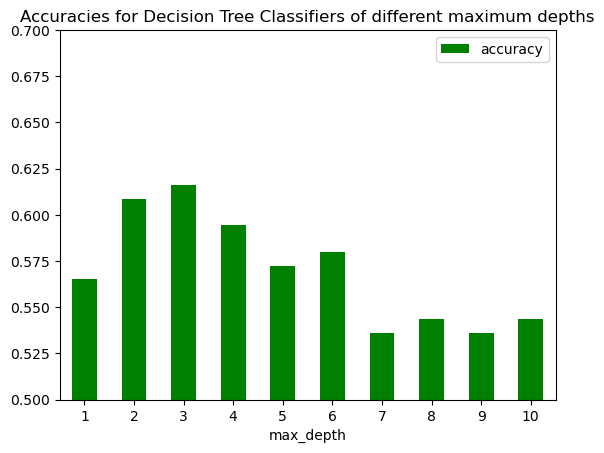

In [16]:
accuracies.plot(kind='bar',
                # alpha=0.75, 
                rot=0,
                color='green',
                title='Accuracies for Decision Tree Classifiers of different maximum depths',
                ylim=(0.5,0.7)
               )

## 2.c) Question: Draw a decision tree

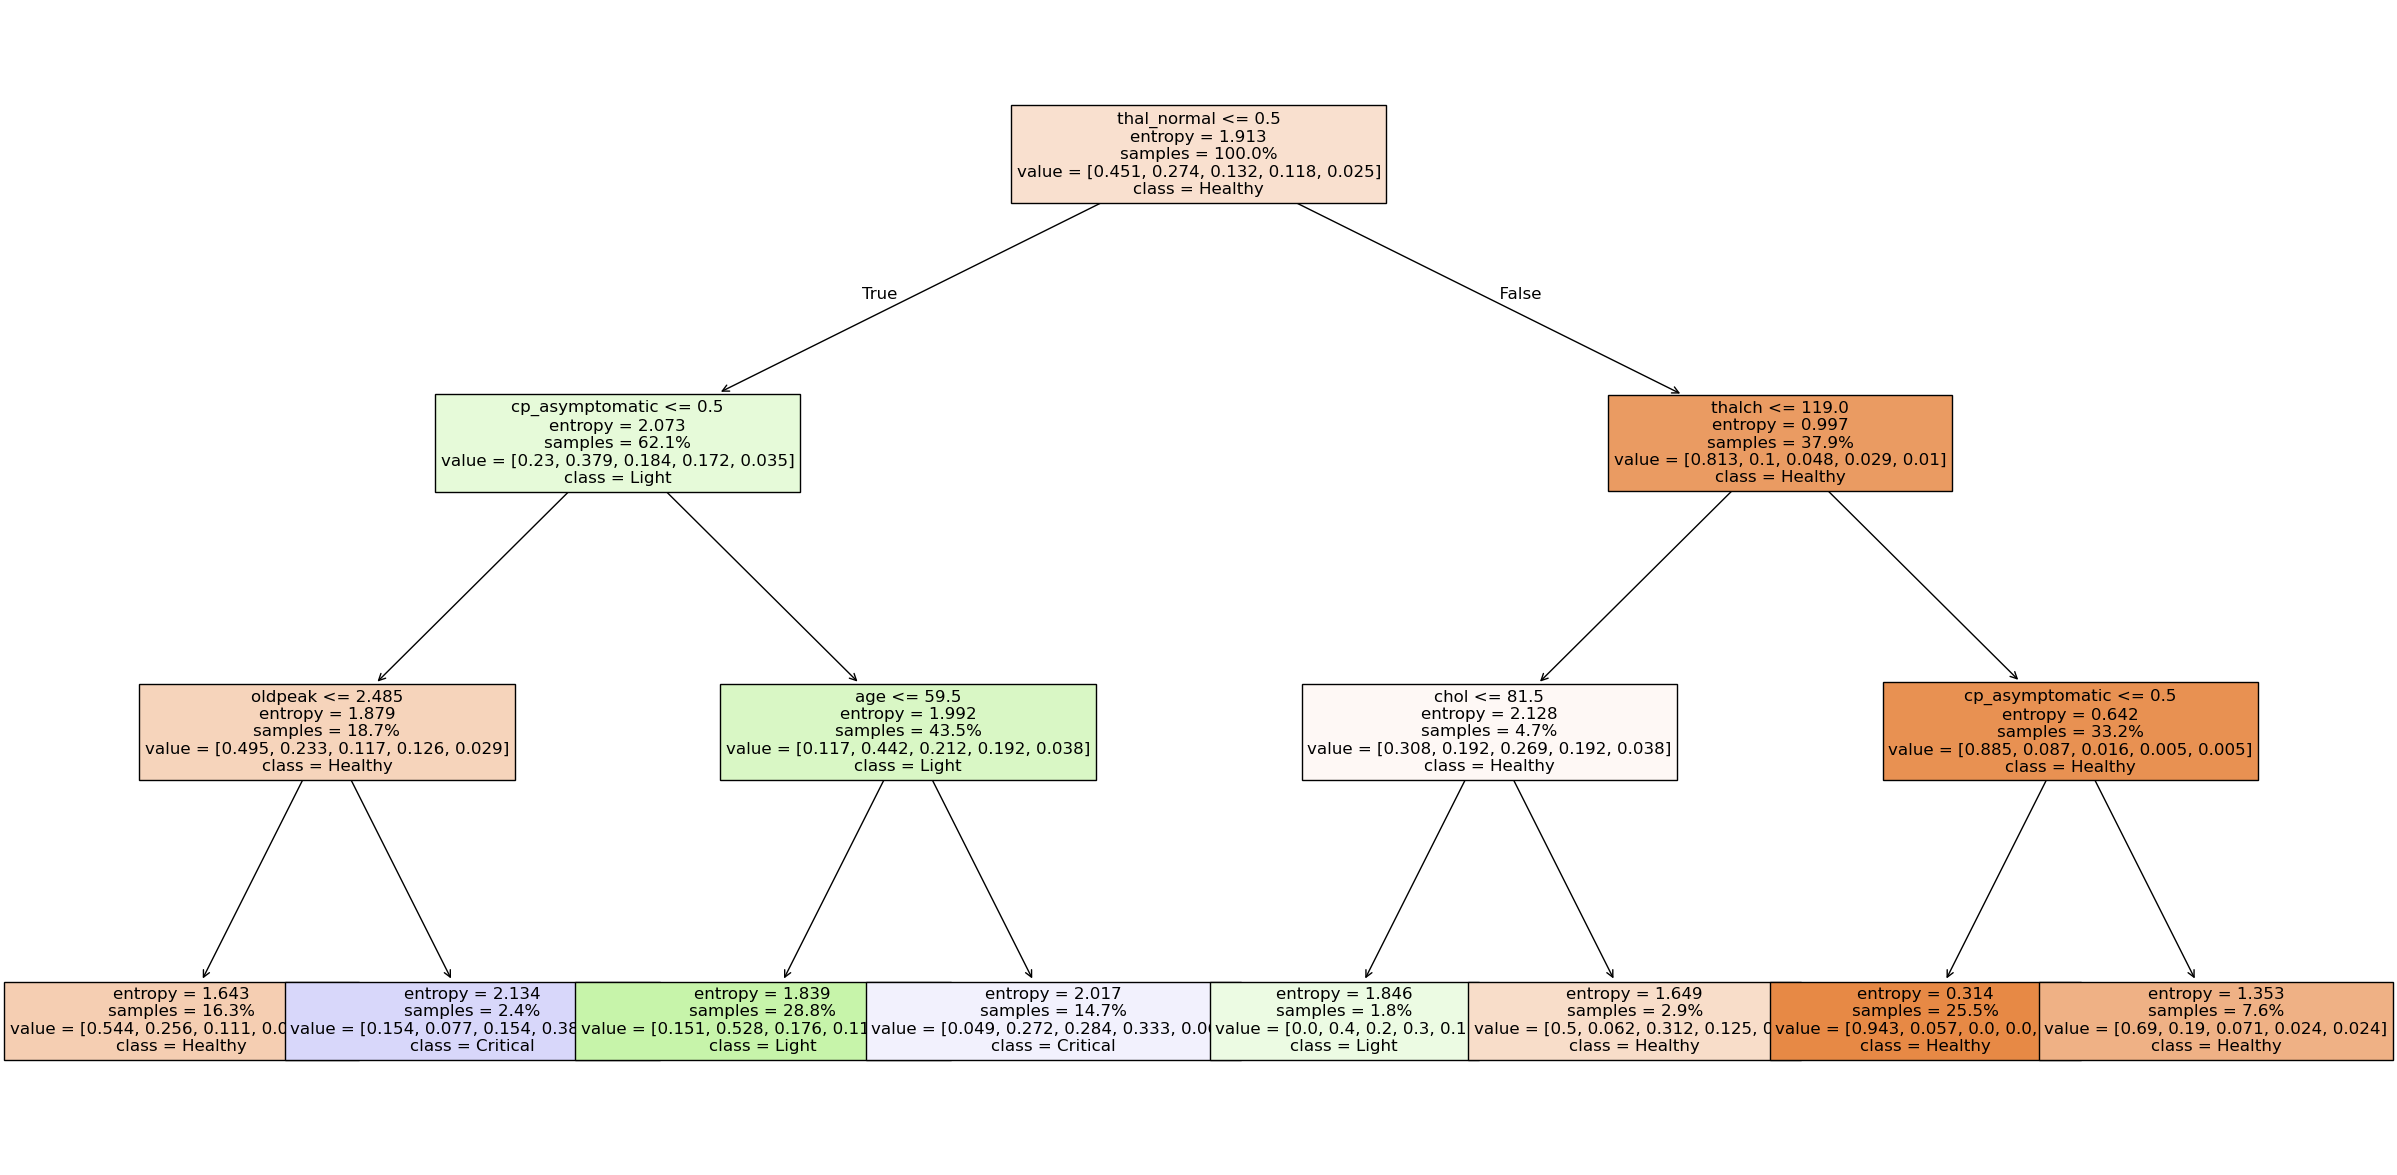

In [17]:
# Create tree with given parameters
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=6, random_state=42, max_depth=3)
dtc.fit(X_train, y_train)

# Plotting the tree
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(dtc,
                   feature_names=X.columns,
                   class_names = {0: 'Healthy', 1: 'Light', 2: 'Seveere', 3: 'Critical',},
                   filled=True,
                   fontsize=12,
                   proportion=True,
                  )

# Save plot to file for export
plt.savefig('tree_high_dpi', dpi=300)

## Bonus Analysis of the importance of the features to the classification

In [18]:
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=6, random_state=42, max_depth=3)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,
                       random_state=42)

In [19]:
dtc.feature_importances_

array([0.07947627, 0.        , 0.03761344, 0.12687638, 0.06410274,
       0.        , 0.        , 0.20129392, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.49063725, 0.        ])

In [20]:
feature_importance = pd.DataFrame(dtc.feature_importances_, index = X.columns).sort_values(0, ascending=False)
feature_importance.rename(columns={0:"importance"}, inplace=True)
feature_importance.head(7)

,importance
thal_normal,0.490637
cp_asymptomatic,0.201294
thalch,0.126876
age,0.079476
oldpeak,0.064103
chol,0.037613
sex_Female,0.000000


<Axes: >

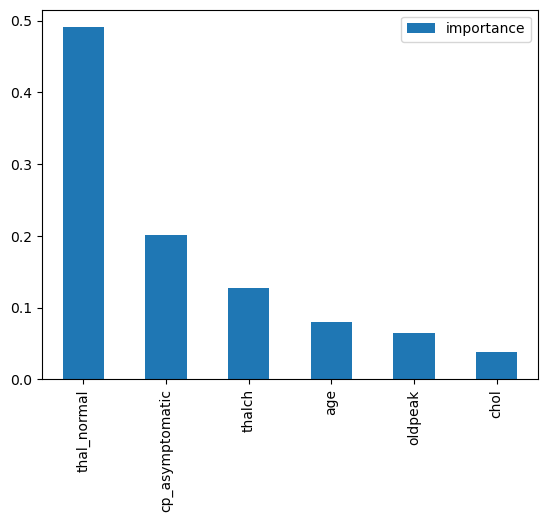

In [21]:
feature_importance.head(6).plot(kind='bar')

The most important feature is thal_normal